In [153]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
import torch
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import optuna

from floOTflix.datasets import toydata_get_dataset
from floOTflix.utils import seed
from floOTflix.plots import plot_heatmap
from floOTflix.models import CLIDIOTModel

# Generate dataset

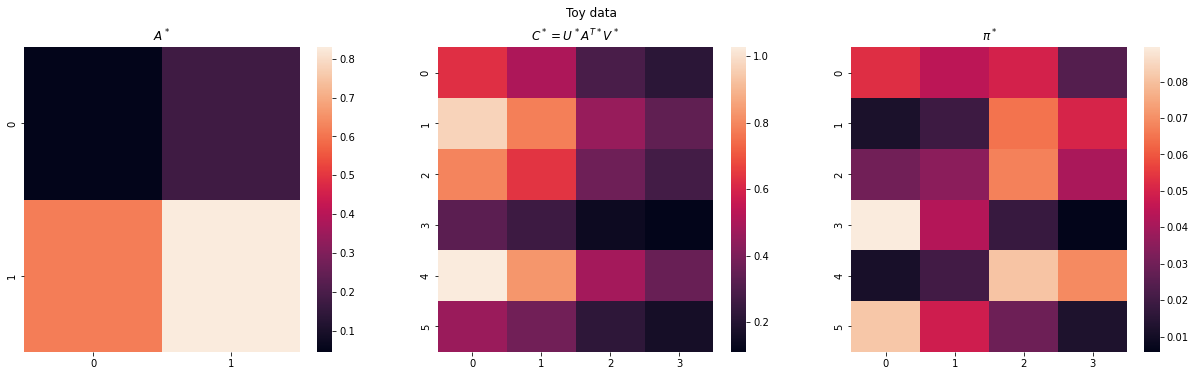

In [155]:
m, n = 6, 4
k = 2

seed(2)

(X_train, y_train), (X_test, y_test), (pi_train, pi_test, C_truth, U_truth, V_truth, A_truth) = toydata_get_dataset(m, n, k)

pi_sample = pi_train.nan_to_num() + pi_test.nan_to_num()
X = torch.cat([X_train, X_test], dim=0)
y = torch.cat([y_train, y_test], dim=0)

plot_heatmap(matrices=[A_truth, C_truth, pi_sample], titles=["$A^*$", "$C^* = U^*{A^T}^*V^*$", "$\pi^*$"], title="Toy data")

# Solve using CLIDIOT

Epoch 0, train error: 0.016740886494517326, test error: 0.014571545645594597
Epoch 10, train error: 0.01386036816984415, test error: 0.012742610648274422
Epoch 20, train error: 0.011770132929086685, test error: 0.01145994197577238
Epoch 30, train error: 0.010700078681111336, test error: 0.010806068778038025
Epoch 40, train error: 0.010105366818606853, test error: 0.010486835613846779
Epoch 50, train error: 0.009754691272974014, test error: 0.01033440139144659
Epoch 60, train error: 0.009540386497974396, test error: 0.010264845564961433
Epoch 70, train error: 0.009408257901668549, test error: 0.01023640763014555
Epoch 80, train error: 0.00932894553989172, test error: 0.010228387080132961
Epoch 90, train error: 0.009286420419812202, test error: 0.010229641571640968


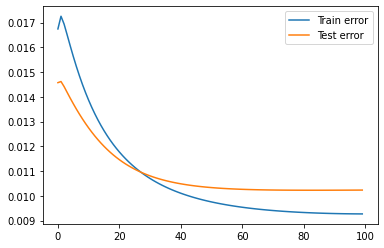

In [156]:
m, n, k = *pi_sample.shape, A_truth.shape[0]

def F(pi_ij):
    return pi_ij


model = CLIDIOTModel(m=m, n=n, F=F)

U = U_truth
V = V_truth
eps = .1
prox_gamma = 100
prox_lr = 1e-3

train_errors, test_errors = model.fit(X, y, X_test, y_test,
                                        U=U,
                                        V=V,
                                        eps=eps,
                                        max_clidiot_iter=100,
                                        #   max_prox_iter=max_prox_iter,
                                        prox_gamma=prox_gamma,
                                        prox_lr=prox_lr,
                                        #   eps_num_stability=eps_num_stability,
                                        verbose=True)

sns.lineplot(x=np.arange(len(train_errors)), y=train_errors, label="Train error")
sns.lineplot(x=np.arange(len(test_errors)), y=test_errors, label="Test error");

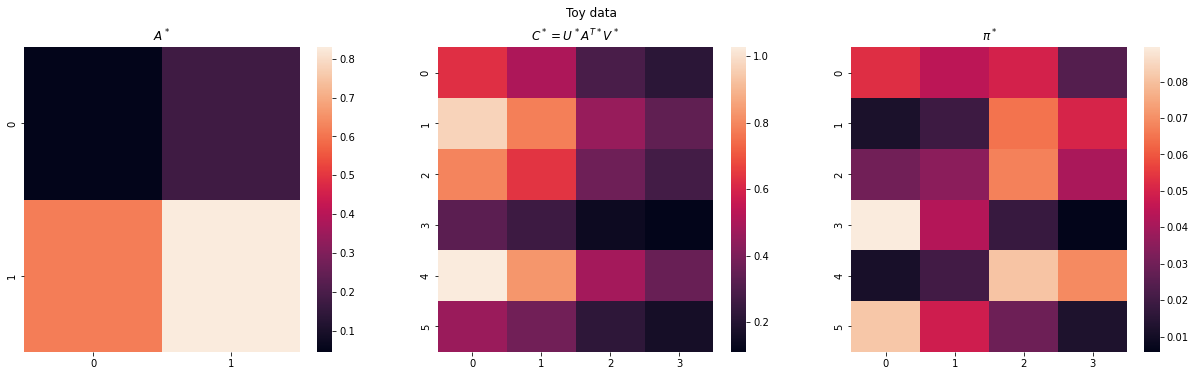

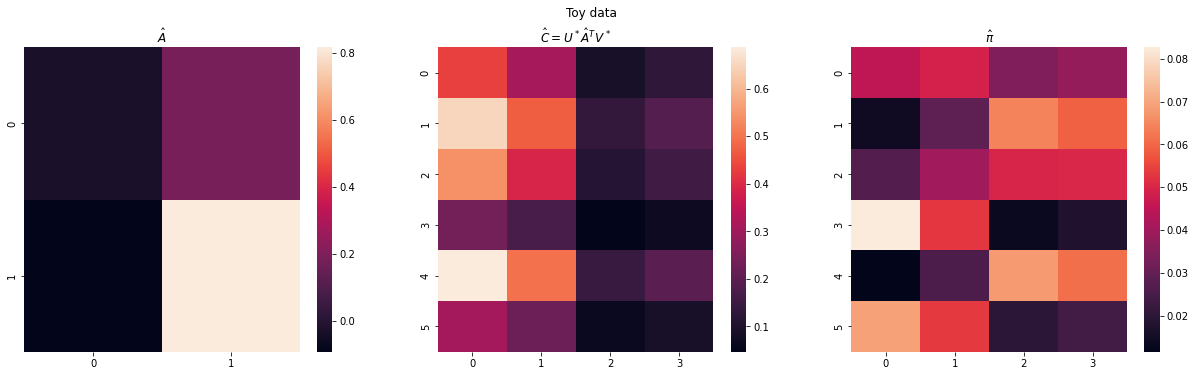

In [159]:
A_hat = model.A
C_hat = U @ A_hat @ V.t()
_, pi_hat = model.predict(X)

plot_heatmap(matrices=[A_truth, C_truth, pi_sample], titles=["$A^*$", "$C^* = U^*{A^T}^*V^*$", "$\pi^*$"], title="Toy data")
plot_heatmap(matrices=[A_hat, C_hat, pi_hat], titles=["$\hat{A}$", "$\hat{C} = U^* \hat{A}^T V^*$", "$\hat{\pi}$"], title="Toy data")